# Read the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('csv-27940.csv', sep=';', on_bad_lines='skip')
df.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Источник,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км"
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,cian.ru,55.631803,37.419269,NaN,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583


In [3]:
df['Дата'].min()

'2022-03-01 09:31:00'

In [4]:
df['Дата'].max()

'2025-02-27 23:34:28'

In [5]:
df['Доп.параметры'][0]

'Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=4 кв. 2022|Название ЖК=Румянцево-Парк|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Тип дома=Монолитный|Этаж=21|Этажей в доме=22|Площадь=52.9'

In [6]:
df['Доп.параметры'][1]

'Площадь кухни=0|Жилая площадь=0|Срок сдачи=1 кв. 2017|Название ЖК=Санрайс|Тип объявления=Продам|Количество комнат=Студия|Вид объекта=Вторичка|Тип дома=Монолитный|Этаж=7|Этажей в доме=17|Площадь=35.6'

In [7]:
df['Доп.параметры'][12]

'Площадь кухни=5.8|Жилая площадь=29.0|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Тип дома=Блочный|Этаж=7|Этажей в доме=12|Площадь=44.2'

In [8]:
df['Доп.параметры'][333]

'Площадь кухни=16.8|Жилая площадь=43.2|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Этаж=20|Этажей в доме=47|Площадь=65.0'

## We filter only new listings (from the last 3 months) for regression analysis.

In [9]:
df1 = df[df['Дата'].str.contains('2025') | df['Дата'].str.contains('2024-12')]
df1.shape

(61063, 26)

In [10]:
# #For time series
# df1 = df 

# Parsing additional attributes

In [11]:
import re

In [12]:
pattern_kitchen = 'Площадь кухни=(.*?)\|.*?'
df1['kitchen'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_kitchen, x).group(1) if re.search(pattern_kitchen, x) else None)
df1.head(1)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\1202385319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['kitchen'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_kitchen, x).group(1) if re.search(pattern_kitchen, x) else None)


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,55.631803,37.419269,NaN,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0


In [13]:
pattern_living_sqm = 'Жилая площадь=(.*?)\|.*?'
df1['living_sqm'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_living_sqm, x).group(1) if re.search(pattern_living_sqm, x) else None)
df1.head(1)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\3758373245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['living_sqm'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_living_sqm, x).group(1) if re.search(pattern_living_sqm, x) else None)


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,37.419269,NaN,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0


In [14]:
pattern_material = 'Тип дома=(.*?)\|.*?'
df1['material'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_material, x).group(1) if re.search(pattern_material, x) else None)
df1.head(1)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\2242024468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['material'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_material, x).group(1) if re.search(pattern_material, x) else None)


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,NaN,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный


In [15]:
pattern_floor = 'Этаж=(.*?)\|.*?'
df1['floor'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_floor, x).group(1) if re.search(pattern_floor, x) else None)
df1.head(1)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\4122234097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['floor'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_floor, x).group(1) if re.search(pattern_floor, x) else None)


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный,21


In [16]:
pattern_n_floors = 'Этажей в доме=(.*?)\|.*?'
df1['n_floors'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_n_floors, x).group(1) if re.search(pattern_n_floors, x) else None)
df1.head(1)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\107984431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['n_floors'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_n_floors, x).group(1) if re.search(pattern_n_floors, x) else None)


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor,n_floors
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный,21,22


In [17]:
pattern_fin_date = 'Срок сдачи=(.*?)\|.*?'
df1['fin_date'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_fin_date, x).group(1) if re.search(pattern_fin_date, x) else None)
df1.head(1)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\3690795297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fin_date'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_fin_date, x).group(1) if re.search(pattern_fin_date, x) else None)


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor,n_floors,fin_date
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный,21,22,4 кв. 2022


In [18]:
pattern_n_rooms = 'Количество комнат=(.*?)\|.*?'
df1['n_rooms'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_n_rooms, x).group(1) if re.search(pattern_n_rooms, x) else None)
df1.head(1)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\3769223050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['n_rooms'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_n_rooms, x).group(1) if re.search(pattern_n_rooms, x) else None)


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor,n_floors,fin_date,n_rooms
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный,21,22,4 кв. 2022,2


In [19]:
df1['Доп.параметры'] = df['Доп.параметры'] + "|"
pattern_sqm = 'Площадь=(.*?)\|.*?'
df1['sqm'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_sqm, x).group(1) if re.search(pattern_sqm, x) else None)
df1.head(1)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\3136471527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Доп.параметры'] = df['Доп.параметры'] + "|"
C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\3136471527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sqm'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_sqm, x).group(1) if re.search(pattern_sqm, x) else None)


,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor,n_floors,fin_date,n_rooms,sqm
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,да,1.583,12.0,0,Монолитный,21,22,4 кв. 2022,2,52.9


## OHC for the type of the house

In [20]:
df1[['Блочный','Деревянный','Кирпичный','Монолитно-кирпичный','Монолитный','Неизвестный','Панельный','Сталинский']] = pd.get_dummies(df1.material)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\1348436484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Блочный','Деревянный','Кирпичный','Монолитно-кирпичный','Монолитный','Неизвестный','Панельный','Сталинский']] = pd.get_dummies(df1.material)
C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_18236\1348436484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Блочный','Деревянный','Кирпичный','Монолитно-кирпичный','Монолитный','Неизвестный','Панельный','Сталинский']] = pd.get_du

In [21]:
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,n_rooms,sqm,Блочный,Деревянный,Кирпичный,Монолитно-кирпичный,Монолитный,Неизвестный,Панельный,Сталинский
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,2,52.9,False,False,False,False,True,False,False,False


## Only used attributes

In [22]:
df1.columns

Index(['Название', 'Цена', 'Дата', 'Телефон', 'Оператор',
       'Контактное лицо (автор объявления)', 'Тип автора', 'Регион', 'Город',
       'Метро/Район', 'Адрес', 'Описание', 'Тип объявления', 'Категория1',
       'Категория2', 'ID на сайте', 'Источник', 'lat', 'lng',
       'Персона для контактов', 'Доп.параметры', 'URL', 'Ссылки на картинки',
       'Регион мобильного телефона', 'Номер подменён',
       'Расстояние до метро, км', 'kitchen', 'living_sqm', 'material', 'floor',
       'n_floors', 'fin_date', 'n_rooms', 'sqm', 'Блочный', 'Деревянный',
       'Кирпичный', 'Монолитно-кирпичный', 'Монолитный', 'Неизвестный',
       'Панельный', 'Сталинский'],
      dtype='object')

In [23]:
df1 = df1[['Цена', 'Дата', 'lat', 'lng', 'Расстояние до метро, км', 'kitchen', 'living_sqm', 'floor',
       'n_floors', 'fin_date', 'n_rooms', 'sqm', 'Блочный', 'Деревянный',
       'Кирпичный', 'Монолитно-кирпичный', 'Монолитный', 'Неизвестный',
       'Панельный', 'Сталинский']]

df1.head(1)

,Цена,Дата,lat,lng,"Расстояние до метро, км",kitchen,living_sqm,floor,n_floors,fin_date,n_rooms,sqm,Блочный,Деревянный,Кирпичный,Монолитно-кирпичный,Монолитный,Неизвестный,Панельный,Сталинский
0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,4 кв. 2022,2,52.9,False,False,False,False,True,False,False,False


In [24]:
df1['sqm_price'] = round(df1['Цена'] / df1['sqm'].astype(float), 2)
df1.head(1)

,Цена,Дата,lat,lng,"Расстояние до метро, км",kitchen,living_sqm,floor,n_floors,fin_date,...,sqm,Блочный,Деревянный,Кирпичный,Монолитно-кирпичный,Монолитный,Неизвестный,Панельный,Сталинский,sqm_price
0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,4 кв. 2022,...,52.9,False,False,False,False,True,False,False,False,274102.06


In [25]:
df1.columns

Index(['Цена', 'Дата', 'lat', 'lng', 'Расстояние до метро, км', 'kitchen',
       'living_sqm', 'floor', 'n_floors', 'fin_date', 'n_rooms', 'sqm',
       'Блочный', 'Деревянный', 'Кирпичный', 'Монолитно-кирпичный',
       'Монолитный', 'Неизвестный', 'Панельный', 'Сталинский', 'sqm_price'],
      dtype='object')

In [26]:
df1 = df1.rename(columns={"Цена": "price",
                         'Дата': 'date',
                         'Метро/Район':'district',
                         'Расстояние до метро, км': "to_subway",
                         'Блочный': 'is_block',
                         'Деревянный': 'is_wooden',
                         'Кирпичный': 'is_brick',
                         'Неизвестный': 'is_unknown',
                         'Панельный': 'is_panel',
                         'Монолитно-кирпичный': 'is_monolithic_block',
                         'Монолитный': 'is_monolithic',
                         'Сталинский': 'is_stalin'})
df1.head(1)

,price,date,lat,lng,to_subway,kitchen,living_sqm,floor,n_floors,fin_date,...,sqm,is_block,is_wooden,is_brick,is_monolithic_block,is_monolithic,is_unknown,is_panel,is_stalin,sqm_price
0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,4 кв. 2022,...,52.9,False,False,False,False,True,False,False,False,274102.06


In [27]:
### additional attribute for studio apartments

df1['is_studio'] = df1['n_rooms'].where(df1['n_rooms'] == 'Студия', 0)
df1['is_studio'] = df1['is_studio'].replace('Студия', 1)
df1[['n_rooms', 'is_studio']][0:3]

,n_rooms,is_studio
0,2,0
1,Студия,1
2,1,0


In [28]:
df1['n_rooms'] = df1['n_rooms'].replace('Студия', 1)

In [29]:
df1[['n_rooms', 'is_studio']][0:3]

,n_rooms,is_studio
0,2,0
1,1,1
2,1,0


## Calculate the distance to the city center using the Haversine formula.

In [30]:
df1['center_lat'] = 55.755621
df1['center_lon'] = 37.618084
df1.head()

,price,date,lat,lng,to_subway,kitchen,living_sqm,floor,n_floors,fin_date,...,is_brick,is_monolithic_block,is_monolithic,is_unknown,is_panel,is_stalin,sqm_price,is_studio,center_lat,center_lon
0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,4 кв. 2022,...,False,False,True,False,False,False,274102.06,0,55.755621,37.618084
1,7000000,2025-02-27 23:34:28,55.533216,37.449327,6.417,0,0,7,17,1 кв. 2017,...,False,False,True,False,False,False,196629.21,1,55.755621,37.618084
2,11850000,2025-02-27 23:34:28,55.639730,37.326680,1,9.6,18.8,9,17,4 кв. 2013,...,False,False,False,False,True,False,306201.55,0,55.755621,37.618084
3,9300000,2025-02-27 23:34:28,55.633572,37.328926,0.417,5.0,14.0,13,22,3 кв. 2024,...,False,False,True,False,False,False,387500.00,1,55.755621,37.618084
4,17500000,2025-02-27 23:34:28,55.774168,37.706955,0.917,7.5,29.0,3,5,None,...,True,False,False,False,False,False,361570.25,0,55.755621,37.618084


In [31]:
import numpy as np

In [32]:
df1['lat1_rad'] = np.radians(df1['lat'])
df1['lon1_rad'] = np.radians(df1['lng'])
df1['lat2_rad'] = np.radians(df1['center_lat'])
df1['lon2_rad'] = np.radians(df1['center_lon'])

In [33]:
df1['dlat'] = df1['lat2_rad'] - df1['lat1_rad']
df1['dlon'] = df1['lon2_rad'] - df1['lon1_rad']

In [34]:
a = np.sin(df1['dlat'] / 2) ** 2 + np.cos(df1['lat1_rad']) * np.cos(df1['lat2_rad']) * np.sin(df1['dlon'] / 2) ** 2

In [35]:
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

In [36]:
df1['distance'] = 6371 * c

In [37]:
df1 = df1.rename(columns ={'distance': 'km_to_center'})
df1.head(1)

,price,date,lat,lng,to_subway,kitchen,living_sqm,floor,n_floors,fin_date,...,is_studio,center_lat,center_lon,lat1_rad,lon1_rad,lat2_rad,lon2_rad,dlat,dlon,km_to_center
0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,4 кв. 2022,...,0,55.755621,37.618084,0.970958,0.653089,0.973119,0.656559,0.002161,0.00347,18.568979


# Preliminary analysis

In [38]:
df1.columns

Index(['price', 'date', 'lat', 'lng', 'to_subway', 'kitchen', 'living_sqm',
       'floor', 'n_floors', 'fin_date', 'n_rooms', 'sqm', 'is_block',
       'is_wooden', 'is_brick', 'is_monolithic_block', 'is_monolithic',
       'is_unknown', 'is_panel', 'is_stalin', 'sqm_price', 'is_studio',
       'center_lat', 'center_lon', 'lat1_rad', 'lon1_rad', 'lat2_rad',
       'lon2_rad', 'dlat', 'dlon', 'km_to_center'],
      dtype='object')

In [39]:
df1 = df1[['sqm_price', 'price', 'to_subway', 'kitchen',
       'floor', 'n_floors', 'n_rooms', 'sqm', 'is_block',
       'is_wooden', 'is_brick', 'is_monolithic_block', 'is_monolithic',
       'is_unknown', 'is_panel', 'is_stalin', 'is_studio',
       'km_to_center']]

In [40]:
df1.dtypes

sqm_price              float64
price                    int64
to_subway               object
kitchen                 object
floor                   object
n_floors                object
n_rooms                 object
sqm                     object
is_block                  bool
is_wooden                 bool
is_brick                  bool
is_monolithic_block       bool
is_monolithic             bool
is_unknown                bool
is_panel                  bool
is_stalin                 bool
is_studio                int64
km_to_center           float64
dtype: object

In [41]:
df1 = df1[df1['to_subway'] != 'неизвестно']

In [42]:
df1['n_rooms'] =df1['n_rooms'].replace('Студия', 1)

In [43]:
df1['to_subway'] = df1['to_subway'].astype(float)
df1['kitchen'] = df1['kitchen'].astype(float) 
#df1['living_sqm'] = df1['living_sqm'].astype(float) 
df1['floor'] = df1['floor'].astype(float) 
df1['n_floors'] = df1['n_floors'].astype(float) 
df1['n_rooms'] = df1['n_rooms'].astype(float)
df1['sqm'] = df1['sqm'].astype(float)

In [44]:
df1.shape


(60261, 18)

In [45]:
count_zeros_nulls = df1.isin([0]).sum() + df1.isnull().sum()

In [46]:
count_zeros_nulls

sqm_price                  0
price                      0
to_subway                  0
kitchen                 5222
floor                      0
n_floors                   0
n_rooms                 1264
sqm                        0
is_block               57217
is_wooden              60256
is_brick               50820
is_monolithic_block    55964
is_monolithic          44187
is_unknown             60234
is_panel               43163
is_stalin              59836
is_studio              56329
km_to_center               0
dtype: int64

In [47]:
kitchen_replace_value = (df1['kitchen'] / df1['sqm']).mean()
kitchen_replace_value

0.18036245927798358

In [48]:
rooms_replace_value = (df1['sqm'] / df1['n_rooms']).mean()
rooms_replace_value

30.49495492143668

In [49]:
df1['material_sum'] = df1['is_block'] + df1['is_wooden'] + df1['is_brick'] + df1['is_monolithic_block'] + df1['is_monolithic'] + df1['is_panel'] + df1['is_stalin'] + df1['is_unknown']
#df1 = df1[df1['material_sum'] != 1].shape[0]

In [50]:
#excluding empty material data
df2 = df1[df1['material_sum'] != 0]

In [51]:
#replacing missing data on kitchen
df2.loc[df2['kitchen'] == 0, 'kitchen'] = df2['sqm'] * kitchen_replace_value

In [52]:
#replacing missing data on rooms
df2.loc[df2['n_rooms'].isna() == True, 'n_rooms'] = round(df2['sqm'] / rooms_replace_value, 0)

In [53]:
df2.loc[df2['n_rooms'] == 0, 'n_rooms'] = 1

# Outliers

In [54]:
Q1 = df2['sqm_price'].quantile(0.25)  # (25 percentile)
Q3 = df2['sqm_price'].quantile(0.75)  # 75 percentile
IQR = Q3 - Q1 

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR


outliers = df2[(df2['sqm_price'] < lower_bound) | (df2['sqm_price'] > upper_bound)]

outliers

,sqm_price,price,to_subway,kitchen,floor,n_floors,n_rooms,sqm,is_block,is_wooden,is_brick,is_monolithic_block,is_monolithic,is_unknown,is_panel,is_stalin,is_studio,km_to_center,material_sum
49,1540000.00,232155000,0.583,17.7,3.0,7.0,4.0,150.75,False,False,False,False,True,False,False,False,0,2.604408,True
63,1176470.59,200000000,0.417,15.0,3.0,16.0,3.0,170.00,False,False,False,False,True,False,False,False,0,2.592665,True
162,1283846.87,137500000,1.000,19.0,4.0,11.0,2.0,107.10,False,False,False,True,False,False,False,False,0,3.929302,True
172,1370129.87,105500000,0.917,16.0,3.0,8.0,2.0,77.00,False,False,False,False,True,False,False,False,0,0.972234,True
173,1162790.70,105000000,1.000,10.0,7.0,21.0,3.0,90.30,False,False,False,False,True,False,False,False,0,4.692972,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60803,1068376.07,200000000,1.000,25.0,37.0,37.0,5.0,187.20,False,False,False,False,True,False,False,False,0,6.394693,True
60910,1100000.00,91300000,0.667,15.0,5.0,21.0,3.0,83.00,False,False,False,False,True,False,False,False,0,3.750010,True
60941,1558441.56,600000000,0.750,25.0,4.0,5.0,6.0,385.00,False,False,False,True,False,False,False,False,0,4.259877,True
61051,1071428.57,75000000,1.167,9.4,6.0,8.0,2.0,70.00,False,False,False,False,False,False,False,True,0,2.454431,True


In [55]:
lower_bound

-310259.83999999985

In [56]:
upper_bound

1061827.94

In [57]:
df2.shape

(50411, 19)

In [58]:
df2 = df2[df2['sqm_price'] < upper_bound]
df2.shape

(48475, 19)

In [59]:

Q1 = df2['sqm'].quantile(0.25)
Q3 = df2['sqm'].quantile(0.75) 
IQR = Q3 - Q1 


lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR


outliers = df2[(df2['sqm'] < lower_bound) | (df2['sqm'] > upper_bound)]

outliers

,sqm_price,price,to_subway,kitchen,floor,n_floors,n_rooms,sqm,is_block,is_wooden,is_brick,is_monolithic_block,is_monolithic,is_unknown,is_panel,is_stalin,is_studio,km_to_center,material_sum
259,563380.28,120000000,1.000,18.000000,24.0,45.0,5.0,213.0,False,False,False,True,False,False,False,False,0,11.944302,True
281,799450.55,145500000,0.417,28.500000,12.0,19.0,5.0,182.0,False,False,True,False,False,False,False,False,0,8.933514,True
331,880281.69,200000000,1.667,40.978351,3.0,17.0,5.0,227.2,False,False,False,False,True,False,False,False,0,8.080624,True
381,934829.06,175000000,1.000,40.000000,37.0,37.0,5.0,187.2,False,False,False,True,False,False,False,False,0,6.394693,True
393,929537.69,158021408,0.833,25.000000,10.0,18.0,4.0,170.0,False,False,False,False,True,False,False,False,0,4.049973,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60779,685915.49,243500000,0.750,65.000000,20.0,20.0,6.0,355.0,False,False,False,True,False,False,False,False,0,3.688283,True
60852,34455.96,13300000,1.333,9.000000,15.0,17.0,1.0,386.0,False,False,False,False,False,False,True,False,0,21.982472,True
60858,238907.85,42000000,5.500,19.100000,10.0,17.0,6.0,175.8,False,False,False,False,False,False,True,False,0,13.791078,True
60918,1061093.25,330000000,0.917,20.000000,16.0,16.0,4.0,311.0,False,False,False,False,True,False,False,False,0,4.382230,True


In [60]:
lower_bound

-57.7

In [61]:
upper_bound

166.3

In [62]:
df2 = df2[df2['sqm'] < upper_bound]
df2.shape

(47410, 19)

# Distributions

Text(0, 0.5, 'Frequency')

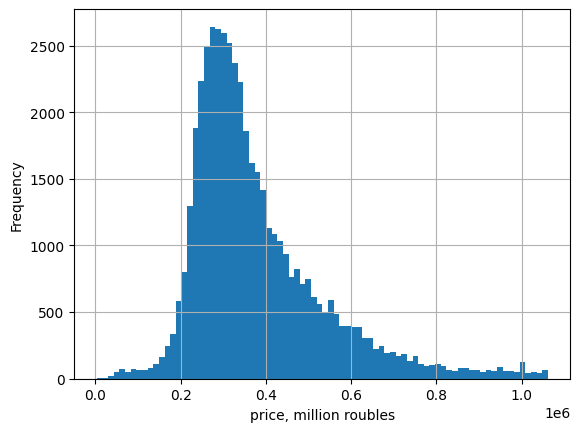

In [63]:
ax = df2['sqm_price'].hist(bins=80)
ax.set_xlabel('price, million roubles')
ax.set_ylabel('Frequency')

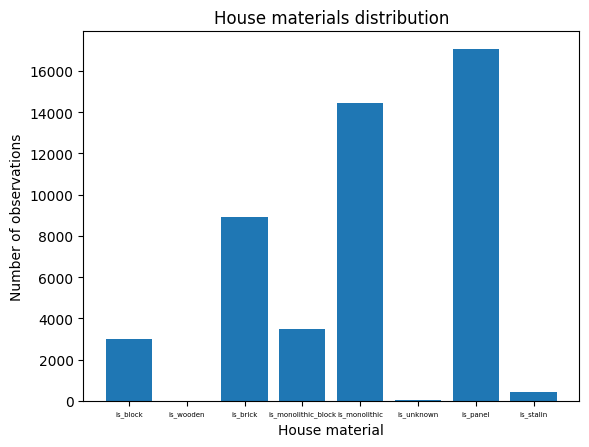

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


material_counts = df2[['is_block','is_wooden','is_brick','is_monolithic_block','is_monolithic','is_unknown','is_panel','is_stalin']].sum()

plt.bar(material_counts.index, material_counts.values)
plt.xlabel("House material")
plt.ylabel("Number of observations")
plt.title("House materials distribution")
plt.xticks(fontsize=5)
plt.show()

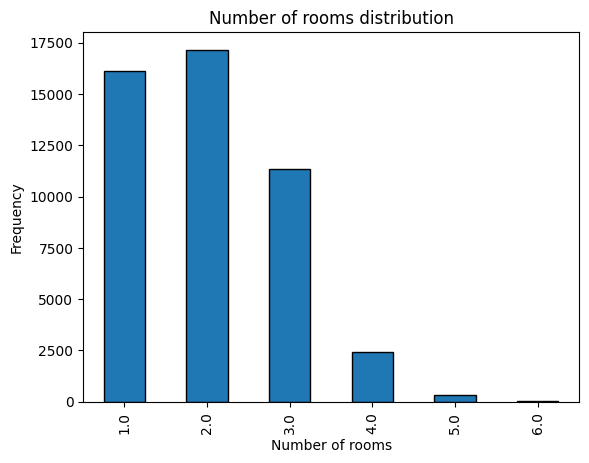

In [65]:
df2['n_rooms'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel("Number of rooms")
plt.ylabel("Frequency")
plt.title("Number of rooms distribution")
plt.show()

In [66]:
df2.columns

Index(['sqm_price', 'price', 'to_subway', 'kitchen', 'floor', 'n_floors',
       'n_rooms', 'sqm', 'is_block', 'is_wooden', 'is_brick',
       'is_monolithic_block', 'is_monolithic', 'is_unknown', 'is_panel',
       'is_stalin', 'is_studio', 'km_to_center', 'material_sum'],
      dtype='object')

In [67]:
df4 = df2[['sqm_price', 'to_subway', 'kitchen', 'floor', 'n_floors', 'n_rooms', 'sqm', 'is_block', 'is_wooden',
          'is_brick', 'is_monolithic_block', 'is_monolithic', 'is_unknown', 'is_panel', 'is_stalin', 'is_studio', 'km_to_center']]

In [68]:
import seaborn as sns

<Axes: >

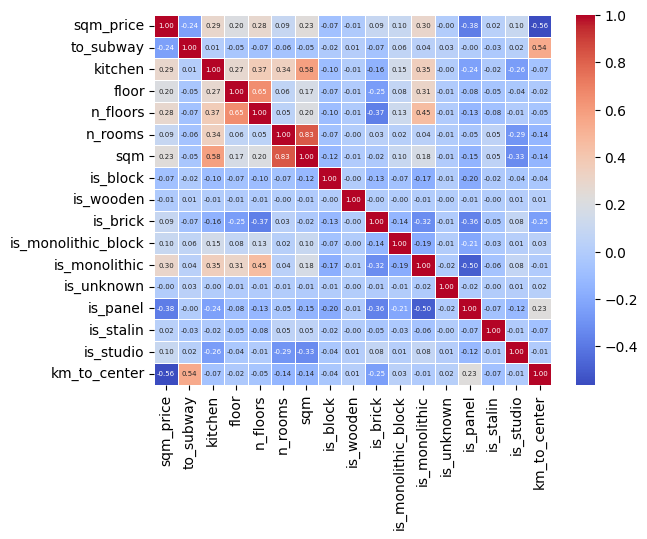

In [69]:
sns.heatmap(df4.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 5})

In [70]:
df4

,sqm_price,to_subway,kitchen,floor,n_floors,n_rooms,sqm,is_block,is_wooden,is_brick,is_monolithic_block,is_monolithic,is_unknown,is_panel,is_stalin,is_studio,km_to_center
0,274102.06,1.583,12.000000,21.0,22.0,2.0,52.9,False,False,False,False,True,False,False,False,0,18.568979
1,196629.21,6.417,6.420904,7.0,17.0,1.0,35.6,False,False,False,False,True,False,False,False,1,26.902150
2,306201.55,1.000,9.600000,9.0,17.0,1.0,38.7,False,False,False,False,False,False,True,False,0,22.349897
3,387500.00,0.417,5.000000,13.0,22.0,1.0,24.0,False,False,False,False,True,False,False,False,1,22.639915
4,361570.25,0.917,7.500000,3.0,5.0,2.0,48.4,False,False,True,False,False,False,False,False,0,5.929708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61057,558002.94,0.500,6.000000,4.0,6.0,3.0,68.1,False,False,True,False,False,False,False,False,0,2.575939
61058,181644.36,2.000,8.600000,11.0,14.0,2.0,52.3,False,False,False,False,False,False,True,False,0,39.040924
61060,362527.47,0.833,19.700000,7.0,11.0,3.0,91.0,False,False,False,True,False,False,False,False,0,6.159144
61061,375000.00,0.333,20.000000,14.0,15.0,3.0,96.0,False,False,False,True,False,False,False,False,0,15.565476


# Modeling

## Linear Regression

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

# Split the data
X = df4.drop(columns=["sqm_price"])  # regressors
y = df4["sqm_price"]  # dependent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# hyperparameters
param_grid = {
    "poly__degree": [1, 2, 3],  # degree of polynomial features
    "lr__fit_intercept": [True, False]
}


pipeline = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)), 
    ("lr", LinearRegression())  
])

# GridSearchCV setting
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    scoring="r2",
    n_jobs=-1,
    verbose=1
)

# Train GridSearchCV
grid_search.fit(X_train, y_train)


print("Best params:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE = sqrt(MSE)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE в %


print(f"Poly LR (tune) R²: {r2:.3f}")
print(f"Poly LR (tune) MSE: {mse:.2f}")
print(f"Poly LR (tune) RMSE: {rmse:.2f}")
print(f"Poly LR (tune) MAE: {mae:.2f}")
print(f"Poly LR (tune) MAPE: {mape:.2f}%")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params: {'lr__fit_intercept': True, 'poly__degree': 1}
Poly LR (tune) R²: 0.481
Poly LR (tune) MSE: 12947384042.95
Poly LR (tune) RMSE: 113786.57
Poly LR (tune) MAE: 80419.67
Poly LR (tune) MAPE: 24.29%


## Random forest

In [73]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest R²: {r2_rf:.3f}")
print(f"Random Forest MSE: {mse_rf:.2f}")

Random Forest R²: 0.811
Random Forest MSE: 4715674064.77


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


X = df4.drop(columns=["sqm_price"])
y = df4["sqm_price"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    "n_estimators": [50, 100, 200],  
    "max_depth": [5, 10, 20], 
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 4]  
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3, 
    scoring="r2",  
    n_jobs=-1,  
    verbose=1
)


grid_search.fit(X_train, y_train)

print("Best parameters Random Forest:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100  # В %


print(f"Random Forest R²: {r2_rf:.3f}")
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest MAPE: {mape_rf:.2f}%")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest R²: 0.806
Random Forest MSE: 4845439712.58
Random Forest RMSE: 69609.19
Random Forest MAE: 44222.54
Random Forest MAPE: 13.58%


## XGBoost

In [75]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

X = df4.drop(columns=["sqm_price"])  
y = df4["sqm_price"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [100, 500],  
    "max_depth": [5, 10, 20],  
    "learning_rate": [0.1],  
    "subsample": [0.7, 1.0],  
    "colsample_bytree": [0.7, 1.0] 
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3, 
    scoring="r2", 
    n_jobs=-1, 
    verbose=1 
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost R²: {r2_xgb:.3f}")
print(f"XGBoost MSE: {mse_xgb:.2f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'subsample': 1.0}
XGBoost R²: 0.822
XGBoost MSE: 4442839726.27


In [76]:
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb) 
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

In [77]:
print(f"XGBoost R²: {r2_xgb:.3f}")
print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost MAPE: {mape_xgb:.2f}%")

XGBoost R²: 0.822
XGBoost MSE: 4442839726.27
XGBoost RMSE: 66654.63
XGBoost MAE: 41248.02
XGBoost MAPE: 12.80%


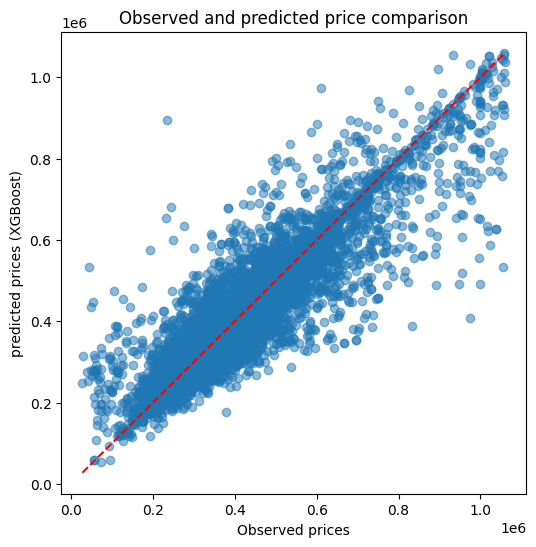

In [78]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Observed prices")
plt.ylabel("predicted prices (XGBoost)")
plt.title("Observed and predicted price comparison")
plt.show()

In [79]:
best_xgb.save_model("best_xgb_model.json")

In [80]:
import pickle

with open("best_xgb_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

In [81]:
import joblib

joblib.dump(best_xgb, "best_xgb_model.joblib")

['best_xgb_model.joblib']

## Catboost

In [82]:
X = df4.drop(columns=["sqm_price"]) 
y = df4["sqm_price"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "iterations": [500], 
    "learning_rate": [0.2],
    "depth": [12],
    "l2_leaf_reg": [1],
    "border_count": [128]
}


cat_model = CatBoostRegressor(verbose=0, random_seed=42)

grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    cv=3,  
    scoring="r2",
    n_jobs=-1, 
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best params CatBoost:", grid_search.best_params_)

best_cat = grid_search.best_estimator_
y_pred_cat = best_cat.predict(X_test)

r2_cat = r2_score(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)

print(f"CatBoost R²: {r2_cat:.3f}")
print(f"CatBoost MSE: {mse_cat:.2f}")



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best params CatBoost: {'border_count': 128, 'depth': 12, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
CatBoost R²: 0.798
CatBoost MSE: 5051092934.50


In [90]:
r2_cat = r2_score(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)  
mae_cat = mean_absolute_error(y_test, y_pred_cat) 
mape_cat = np.mean(np.abs((y_test - y_pred_cat) / y_test)) * 100 

In [91]:
print(f"XGBoost R²: {r2_cat:.3f}")
print(f"XGBoost MSE: {mse_cat:.2f}")
print(f"XGBoost RMSE: {rmse_cat:.2f}")
print(f"XGBoost MAE: {mae_cat:.2f}")
print(f"XGBoost MAPE: {mape_cat:.2f}%")

XGBoost R²: 0.798
XGBoost MSE: 5051092934.50
XGBoost RMSE: 71071.04
XGBoost MAE: 45755.02
XGBoost MAPE: 14.01%
